### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the final section of this lesson.


(1) What is the independent variable? What is the dependent variable?

>Answer:
Independent variable is test type. There are two test types: Color and word matching (congruent), and color and word do not match (non-congruent).

>Dependent variable is the amount of time it takes to complete the test.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

> Since the idea of the experiment is to see whether the color and word not matching has an impact on how long it takes to identify the color of the text, we will want to state that our null hypothesis is that the amount of time it takes is the same and then disprove the null hypothesis.

> We haven't yet analyzed the data, therefore we won't make any assumptions about directionality.

**Since there is no directional component associated with this statement, a not equal to seems most reasonable.**

$$H_0: \mu_{con} - \mu_{non} = 0$$


$$H_1: \mu_{con} - \mu_{non} \neq 0$$


**$\mu_{con}$ and $\mu_{non}$ are the population mean values for the durations of the congruent case and non-congruent cases, respectivley.**

Imports:

In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

df = pd.read_csv('stroopdata.csv')

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.


In [3]:
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [4]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


--write answer here--

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

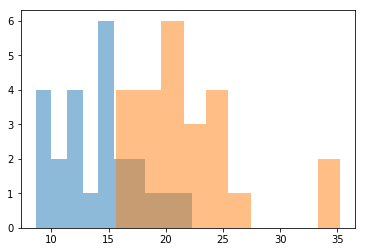

In [5]:
cong = df['Congruent']
non = df['Incongruent']
plt.hist(cong, alpha = 0.5);
plt.hist(non, alpha = 0.5); 

(array([ 7.,  1.,  4.,  5.,  5.,  0.,  0.,  1.,  0.,  1.]),
 array([  1.95  ,   3.9469,   5.9438,   7.9407,   9.9376,  11.9345,
         13.9314,  15.9283,  17.9252,  19.9221,  21.919 ]),
 <a list of 10 Patch objects>)

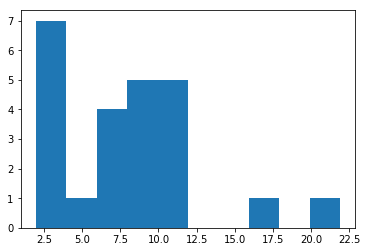

In [6]:
df['diff']=df['Incongruent']- df['Congruent']
diffs = np.array(df['diff'])
plt.hist(diffs)

>Answer:
1. While both types of tests show a somewhat similar shape (right-skew), it looks like the congruent times are consistently lower than the incongruent times.
2. When we create a histogram for a new variable (incongruent-congruent) we can see that this is proven out - since even the smallest value is greater than zero, none of the samples show a smaller incongruent value than a congruent value.
3. None of the three variables show a normal distribution.
We could at this point modify the null and alternative hypotheses to show directionality:

$$ H_0 \, : \, \mu_{con} >= \mu_{non} $$
$$ H_1 \, : \, \mu_{con} < \mu_{non} $$

Or stated differently:

$$ H_0 \, : \, \mu_{diffs} <= 0 $$
$$ H_1 \, : \, \mu_{diffs} > 0 $$

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

>In order to see if we can reject the null hypothesis, we'll do a 1-sample t-test on the diffs array. We'll use alpha of 0.05 (rule of thumb)

In [15]:
true_mu = 0

onesample_results = scipy.stats.ttest_1samp(diffs, true_mu)
print('t-statistic: ' + str(onesample_results[0]), 'p-value: ' + str(onesample_results[1]))

t-statistic: 8.02070694411 p-value: 4.10300058571e-08


> Since our p-value is much smaller than our Test-Statistic, we have good evidence to reject the null-hypothesis at the 0.05 significance level. Therefore we reject the null: The incongruent case does take longer than the congruent case.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--

## References
In addition to using my own notes from DAND Term 1, I read over the below as well:

http://www.statisticshowto.com/when-to-use-a-t-score-vs-z-score/

http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/basics/directional-and-nondirectional-hypotheses/

http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/basics/what-is-a-critical-value/

https://en.wikipedia.org/wiki/Student%27s_t-test#Unpaired_and_paired_two-sample_t-tests

https://plot.ly/python/t-test/

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_1samp.html